# Stock Data Analysis
### By: Daniel Wetta

In [1]:
#Stock Data Analysis 

In [2]:
# Must run this on Anaconda Powershell prompt:
# conda install quandl
# conda install pandas-datareader

# Must also create a QUANDL Account to use their API's (free)

In [3]:
conda install quandl

Solving environment: done

## Package Plan ##

  environment location: /Users/jetta47/opt/anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    inflection-0.3.1           |           py37_1          10 KB
    quandl-3.4.8               |           py37_0          51 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  inflection         pkgs/main/osx-64::inflection-0.3.1-py37_1
  quandl             pkgs/main/osx-64::quandl-3.4.8-py37_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0



conda-4.8.3          | 2.8 MB    | ##################################### | 100% 
quandl-3.4.8     

In [4]:
conda install pandas-datareader

Solving environment: done

## Package Plan ##

  environment location: /Users/jetta47/opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-datareader-0.8.1    |             py_0          71 KB
    ------------------------------------------------------------
                                           Total:          71 KB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.8.1-py_0



pandas-datareader-0. | 71 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [112]:
import pandas as pd
import quandl
import datetime

#My API Key
quandl.ApiConfig.api_key = "y2T37y4hYDaU5BasgmcR"

# We will look at stock prices over the past year, starting at January 1, 2017
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)

 
type(apple)

pandas.core.frame.DataFrame

In [113]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,114.715378,28781865.0
2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,114.586983,21118116.0
2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.488219,115.420756,114.379577,115.169696,22193587.0
2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0
2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0


Populating the interactive namespace from numpy and matplotlib


/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 1.0, 'Adjusted Closing Price for Apple')

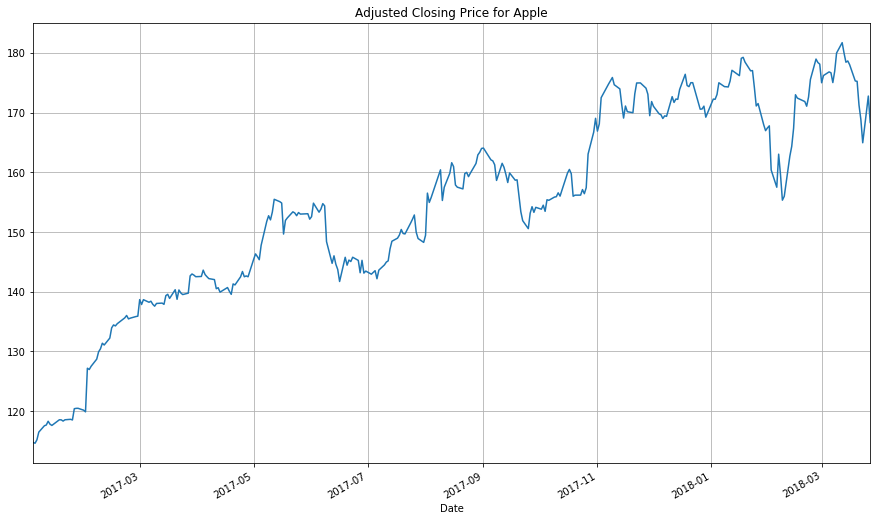

In [114]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL
plt.title('Adjusted Closing Price for Apple')

In [115]:
pip install mpl-finance

Note: you may need to restart the kernel to use updated packages.


In [116]:
pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /Users/jetta47/opt/anaconda3/lib/python3.7/site-packages (0.12.3a3)
Note: you may need to restart the kernel to use updated packages.


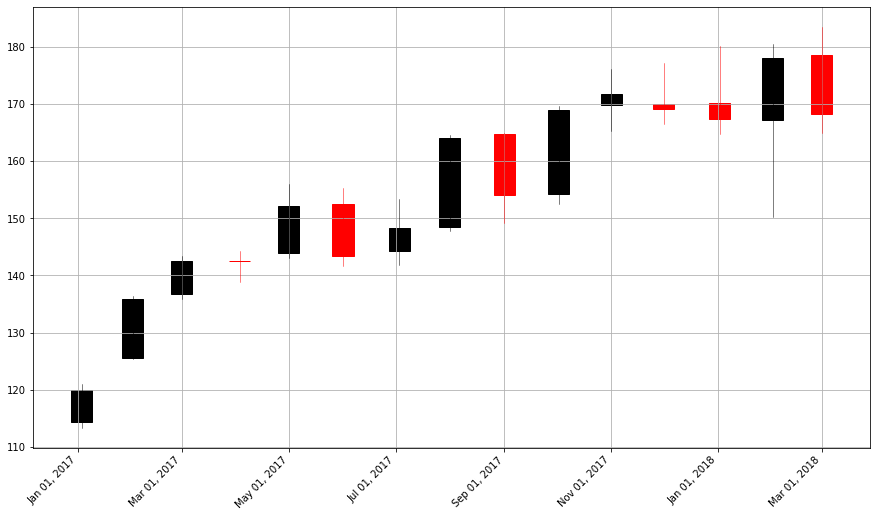

In [117]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    if adj:
        fields = ["Adj. " + s for s in fields]
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('300 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True, figsize=(10,10))
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()
 
pandas_candlestick_ohlc(apple, adj=True, stick="month")

In [118]:
microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG"])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})
 
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,114.715378,61.219142,786.14
2017-01-04,114.586983,60.945231,786.90
2017-01-05,115.169696,60.945231,794.02
2017-01-06,116.453639,61.473488,806.15
2017-01-09,117.520300,61.277837,806.65


Text(0.5, 1.0, 'Absolute Price for Apple, Microsoft, and Google')

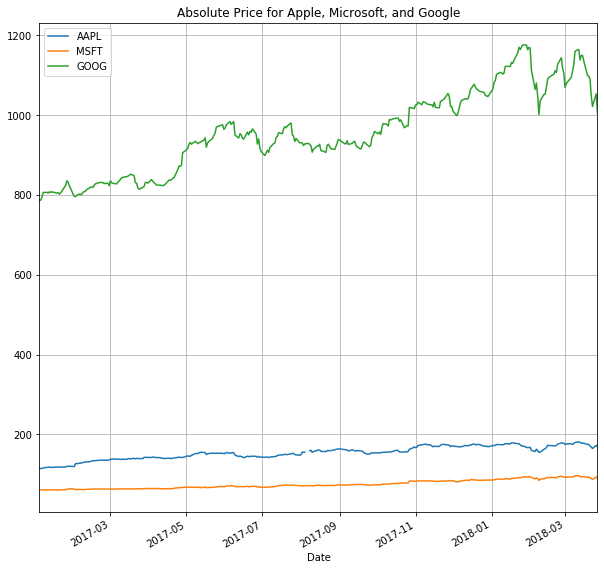

In [119]:
stocks.plot(grid = True, figsize=(10,10))
plt.title('Absolute Price for Apple, Microsoft, and Google')

Text(0.5, 1.0, 'Relative Change of an Asset for Apple, Microsoft, and Google')

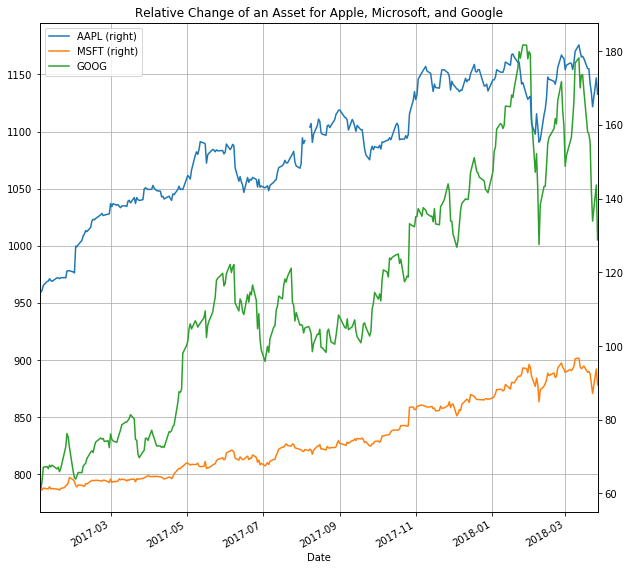

In [120]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True, figsize=(10,10))
plt.title('Relative Change of an Asset for Apple, Microsoft, and Google')

In [121]:
# python
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,0.000000,0.000000,0.000000
2017-01-04,-0.001119,-0.004474,0.000967
2017-01-05,0.003960,-0.004474,0.010024
2017-01-06,0.015153,0.004155,0.025453
2017-01-09,0.024451,0.000959,0.026090


Text(0.5, 1.0, 'Stock Returns for Apple, Microsoft, and Google')

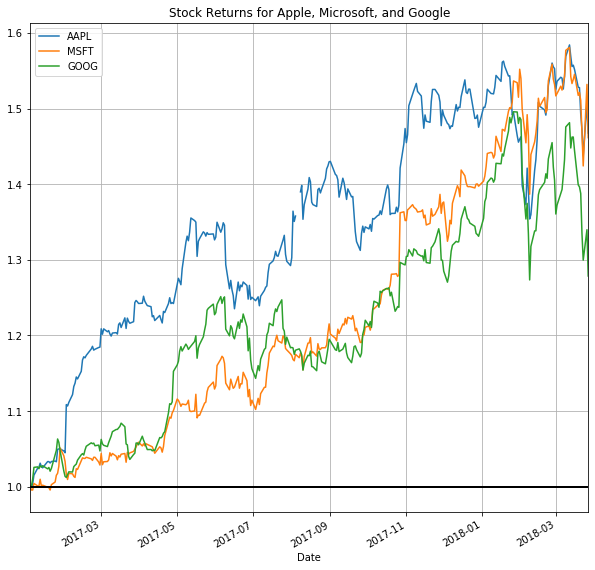

In [122]:
stock_return.plot(grid = True, figsize=(10,10)).axhline(y = 1, color = "black", lw = 2)
plt.title('Stock Returns for Apple, Microsoft, and Google')

In [123]:
# Another way to model the growth of a stock is with log differences.

#The advantage of using log differences is that this difference 
#can be interpreted as the percentage change in a stock 
#but does not depend on the denominator of a fraction. 

#Additionally, log differences have a desirable property: 
#the sum of the log differences can be interpreted as the total change (as a percentage) 
#over the period summed (which is not a property of the other formulations; 
#they will overestimate growth). Log differences also more cleanly correspond to how stock prices are 
#modeled in continuous time.

In [124]:
# NumPy's log function
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,-0.001120,-0.004484,0.000966
2017-01-05,0.005072,0.000000,0.009007
2017-01-06,0.011087,0.008630,0.015161
2017-01-09,0.009118,-0.003188,0.000620


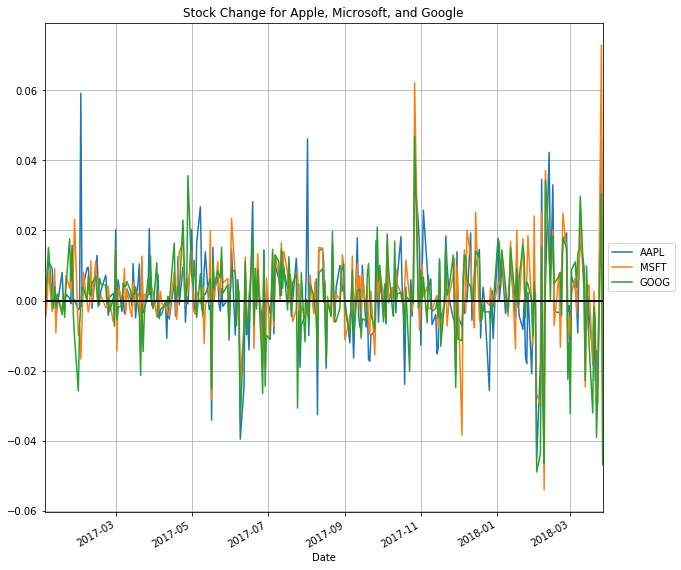

In [125]:
stock_change.plot(grid = True, figsize=(10,10)).axhline(y = 0, color = "black", lw = 2)
plt.title('Stock Change for Apple, Microsoft, and Google')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [126]:
# Read from a file, obtained from here: http://www.nasdaq.com/symbol/spy/historical
# Read the SPDR S&P 500 ("SPY") SPY info into a DataFrame
import pandas as pd
spyderdat = pd.read_csv("../Stocks/SPY.csv", delimiter=',') # Specific to my system
spyderdat = pd.DataFrame(spyderdat)
spyderdat.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/17/2020,252.80,262070500,245.04,256.1700,237.0700
1,03/16/2020,239.85,297240000,241.18,256.9000,237.3600
2,03/13/2020,269.32,329566100,263.09,271.4754,248.5237
3,03/12/2020,248.11,392220700,256.00,266.6600,247.6800
4,03/11/2020,274.36,256416600,280.70,281.9400,270.8800


In [127]:
spyderdat.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [128]:
spyderdat = pd.DataFrame(spyderdat.loc[:, ['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']].iloc[1:].as_matrix(),
                         index=pd.DatetimeIndex(spyderdat.iloc[1:, 0]),
                         columns=['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']
                        ).sort_index()

/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [129]:
spyder = spyderdat.loc[start:end]

In [130]:
stocks = stocks.join(spyder.loc[:, ' Close/Last']).rename(columns={' Close/Last': "SPY"})

In [131]:
stocks.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2017-01-03,114.715378,61.219142,786.14,225.24
2017-01-04,114.586983,60.945231,786.90,226.58
2017-01-05,115.169696,60.945231,794.02,226.4
2017-01-06,116.453639,61.473488,806.15,227.21
2017-01-09,117.520300,61.277837,806.65,226.46


Text(0.5, 1.0, 'Stock Returns for Apple, Microsoft, Google, and SPDR S&P 500')

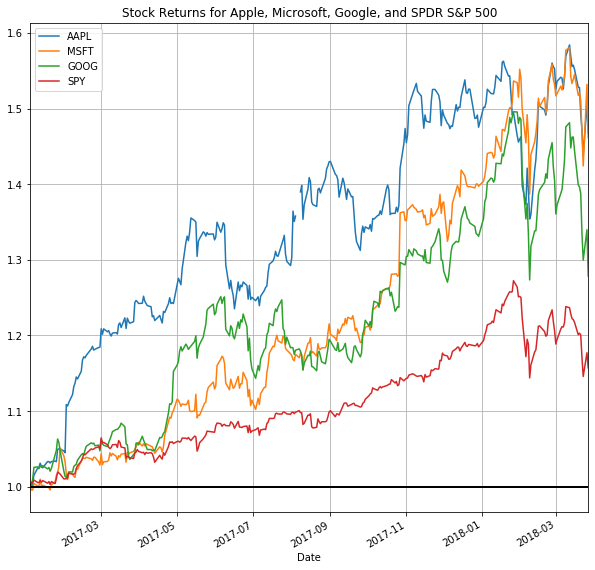

In [132]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True, figsize=(10,10)).axhline(y = 1, color = "black", lw = 2)
plt.title('Stock Returns for Apple, Microsoft, Google, and SPDR S&P 500')

In [133]:
stocks.dtypes

AAPL    float64
MSFT    float64
GOOG    float64
SPY      object
dtype: object

In [134]:
stocks['SPY']=stocks['SPY'].astype('float64')

In [135]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

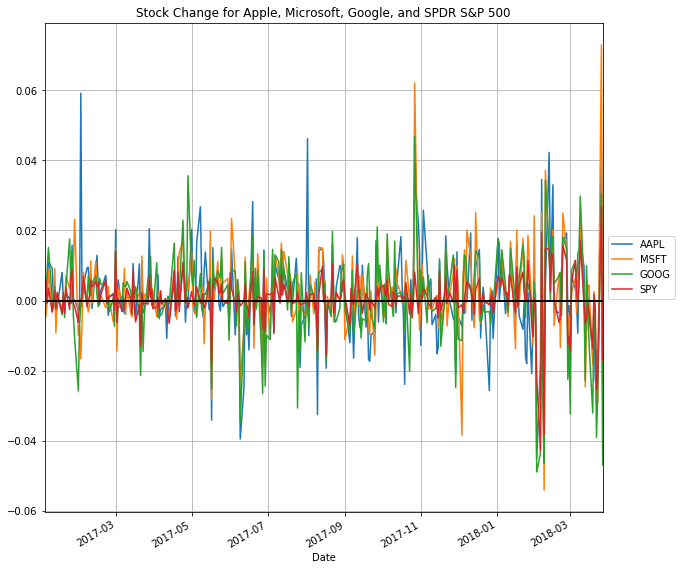

In [136]:
stock_change.plot(grid=True, figsize=(10,10)).axhline(y = 0, color = "black", lw = 2,)
plt.title('Stock Change for Apple, Microsoft, Google, and SPDR S&P 500')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Classical Risk Metrics

In [137]:
#Annual percentage rate (APR)

In [138]:
# There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr = stock_change * 252 * 100    
stock_change_apr.tail()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2018-03-21,-577.463148,-176.499833,-157.285338,-48.409635
2018-03-22,-359.355133,-743.873619,-984.592233,-637.937081
2018-03-23,-589.663945,-743.366326,-669.637836,-542.932908
2018-03-26,1168.762361,1839.012005,768.649993,680.185034
2018-03-27,-654.582257,-1185.615651,-1178.241231,-432.385872


In [139]:
# Risk-free rate (The rate of return on a risk-free financial asset)

In [140]:
tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
tbill.tail()

,Value
Date,
2019-10-01,1.65
2019-11-01,1.54
2019-12-01,1.54
2020-01-01,1.52
2020-02-01,1.52


Text(0.5, 1.0, 'Risk-Free Rate Graph')

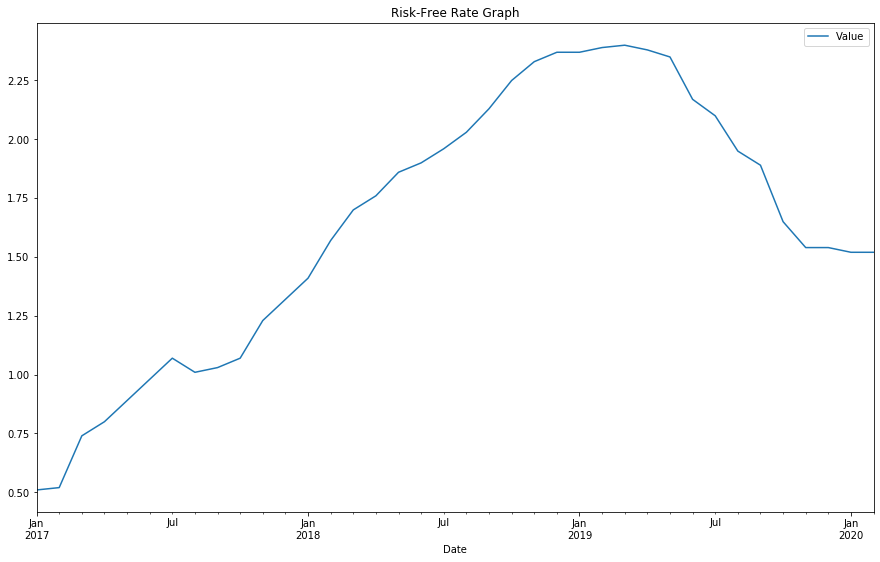

In [141]:
tbill.plot()
plt.title('Risk-Free Rate Graph')

In [142]:
# Get the most recent Treasury Bill rate
rrf = tbill.iloc[-1, 0]  
rrf

1.52

In [143]:
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)    # Since RRF is constant it doesn't change the
                                                                           # correlation so we can ignore it in our
                                                                           # calculation
smcorr

AAPL    0.621166
MSFT    0.737923
GOOG    0.733031
dtype: float64

In [144]:
# Then I compute \alpha and \beta.

In [145]:
sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()
sy

AAPL    312.375699
MSFT    302.202353
GOOG    308.232965
dtype: float64

In [146]:
# Standard deviation for x
sx 

170.4682751223667

In [147]:
ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf
ybar

AAPL    28.144423
MSFT    29.525374
GOOG    18.583335
dtype: float64

In [148]:
xbar

10.410740715808572

In [149]:
beta = smcorr * sy / sx
alpha = ybar - beta * xbar
beta

AAPL    1.138260
MSFT    1.308174
GOOG    1.325433
dtype: float64

In [150]:
alpha

AAPL    16.294291
MSFT    15.906316
GOOG     4.784591
dtype: float64

In [151]:
# Sharpe ratio (Sharpe ratio is the stock's returns minus the risk free rate over the stock's volatility)

In [152]:
sharpe = (ybar - rrf)/sy
sharpe

AAPL    0.085232
MSFT    0.092671
GOOG    0.055359
dtype: float64

In [153]:
(xbar - rrf)/sx

0.05215481126577107

# Moving Averages

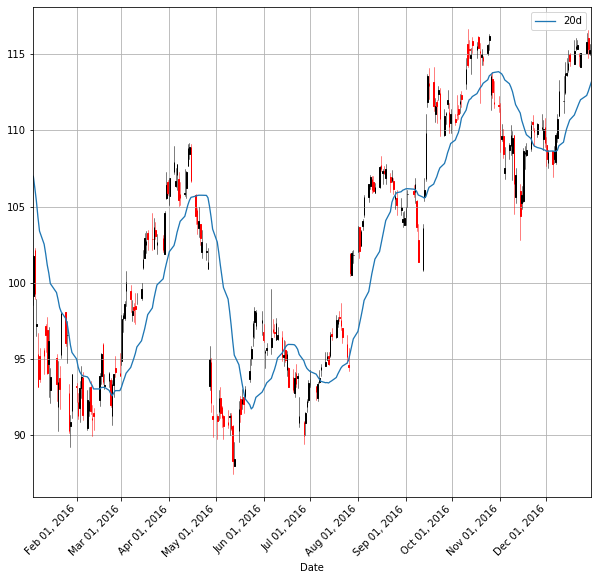

In [154]:
start = datetime.datetime(2010,1,1)
apple = quandl.get("WIKI/AAPL", start_date=start, end_date=end)
apple["20d"] = np.round(apple["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = "20d", adj=True)

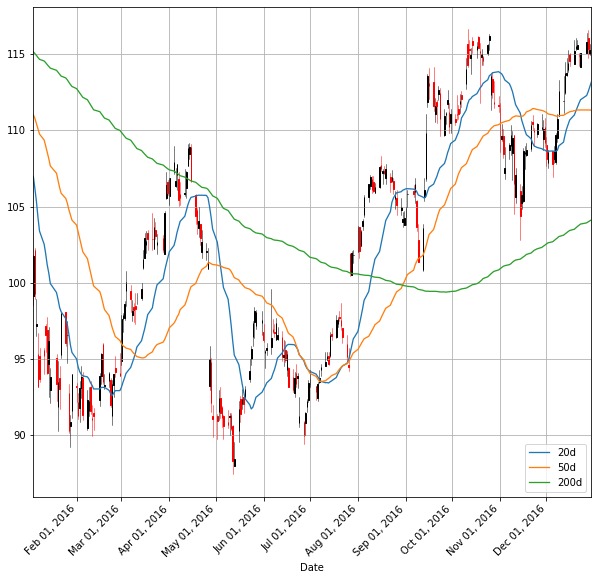

In [155]:
apple["50d"] = np.round(apple["Adj. Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Adj. Close"].rolling(window = 200, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = ["20d", "50d", "200d"], adj=True)

In [156]:
# Bearish trend: the stock is trending downward over time.

In [157]:
# Bullish trend: the stock is trending upward over time.

In [158]:
# Trading signals: indications that a financial security is changing direction and a profitable trade might be made.